In [1]:
# Solar Generation Model using NREL PVWatts

In [2]:
# Import libraries and specify NREL API key
import sys, os
sys.path.append(os.path.abspath(".."))

import pandas as pd
import matplotlib.pyplot as plt
from src.solar_profile import get_pvwatts_data, validate_solar_profile
from src.report_utils import save_figure, save_dataframe

api_key = os.getenv("NREL_API_KEY")
if not api_key:
    raise ValueError("Missing NREL_API_KEY environment variable.")

OUTPUT_DIR = "../outputs"
os.makedirs(OUTPUT_DIR, exist_ok=True)


In [3]:
# Retrieve hourly solar generation
solar_df = get_pvwatts_data(
    api_key=api_key,
    lat=42.8864,              # Niagara Square (placeholder) for Buffalo
    lon=-78.8784,
    system_capacity_kw=1000,  # 1 MW system - nameplate capacity in kw
    tilt=43,                  # tilt angle accounting for snow fall
    azimuth=180               # south-facing
)

save_dataframe(solar_df, "solar_hourly_2024.csv")
solar_df.head()

Solar data prepared: 8784 hourly rows.
Total annual generation (MWh): 1,204.90
Saved DataFrame → solar_hourly_2024.csv


,AC_MWh
2024-01-01 00:00:00-05:00,0.0
2024-01-01 01:00:00-05:00,0.0
2024-01-01 02:00:00-05:00,0.0
2024-01-01 03:00:00-05:00,0.0
2024-01-01 04:00:00-05:00,0.0


In [4]:
# Visualizations
daily, monthly, solar_stats = validate_solar_profile(solar_df)
print(solar_stats)

{'annual_MWh_per_MW': np.float64(1204.9040002289998), 'peak_hour_MWh_per_MW': 0.8333333329999999, 'capacity_factor': np.float64(0.13754611874760272)}


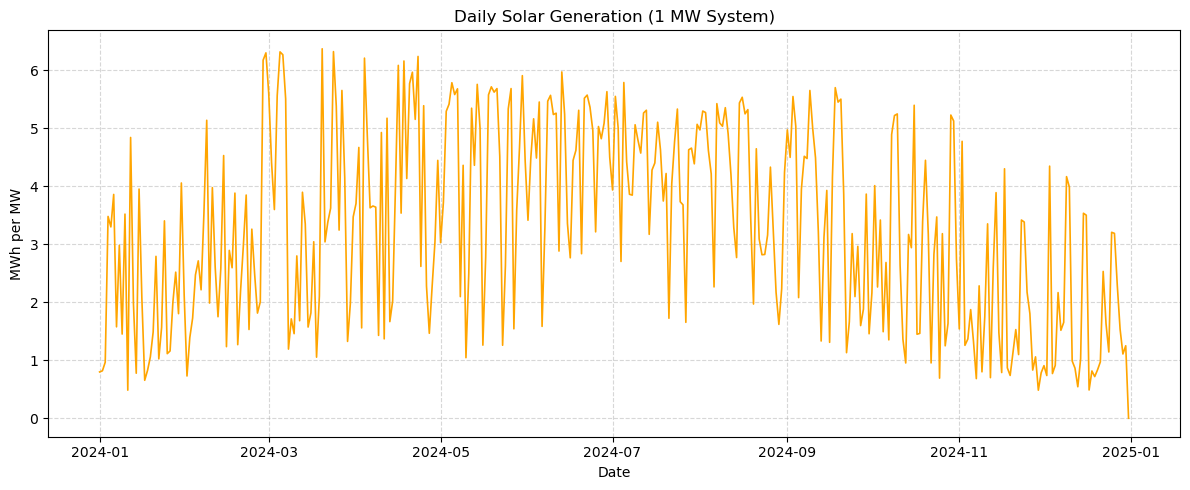

In [5]:
# Daily total generation
daily = solar_df.resample("D").sum()
fig1, ax1 = plt.subplots(figsize=(12,5))
ax1.plot(daily.index, daily["AC_MWh"], color="orange", lw=1.2)
ax1.set_title("Daily Solar Generation (1 MW System)")
ax1.set_ylabel("MWh per MW")
ax1.set_xlabel("Date")
ax1.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()
save_figure(fig1, "daily_solar_generation.png")

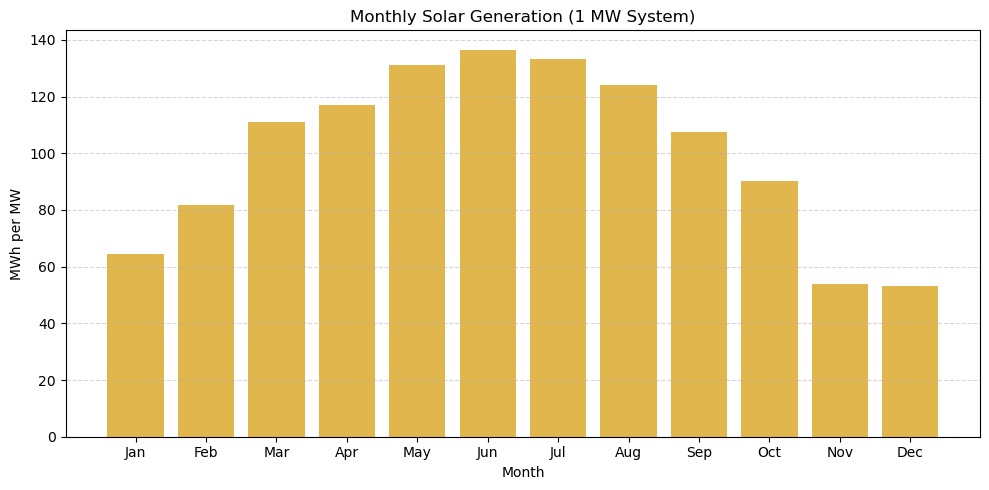

In [6]:
# Monthly total generation
monthly = solar_df.resample("ME").sum()
fig2, ax2 = plt.subplots(figsize=(10,5))
ax2.bar(monthly.index.strftime("%b"), monthly["AC_MWh"], color="goldenrod", alpha=0.8)
ax2.set_title("Monthly Solar Generation (1 MW System)")
ax2.set_ylabel("MWh per MW")
ax2.set_xlabel("Month")
ax2.grid(True, axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()
save_figure(fig2, "monthly_solar_generation.png")

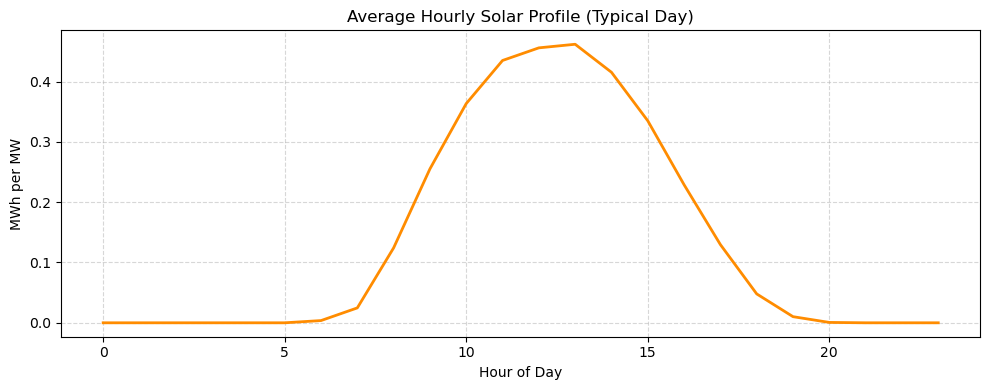

In [7]:
# Average hourly profile
hourly_avg = solar_df.groupby(solar_df.index.hour)["AC_MWh"].mean()
fig3, ax3 = plt.subplots(figsize=(10,4))
ax3.plot(hourly_avg.index, hourly_avg.values, color="darkorange", lw=2)
ax3.set_title("Average Hourly Solar Profile (Typical Day)")
ax3.set_xlabel("Hour of Day")
ax3.set_ylabel("MWh per MW")
ax3.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()
save_figure(fig3, "hourly_solar_profile.png")